In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\USER\Desktop\BHARATINTERN_DS\Task 2\titanic.csv")

In [3]:
# Preprocess the data
data = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [4]:
# Convert categorical features to one-hot encoding
data = pd.get_dummies(data, columns=['Pclass', 'SibSp', 'Parch'])

In [5]:
# Split the data into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train multiple classification models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

Logistic Regression Accuracy: 0.8044692737430168 



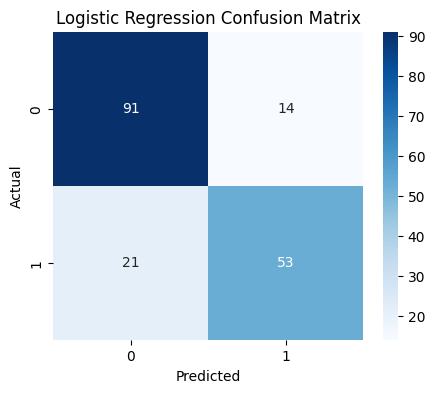

Logistic Regression Classification Report: 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179
 

----------------+---------------------+------------------ 

Decision Tree Accuracy: 0.7430167597765364 



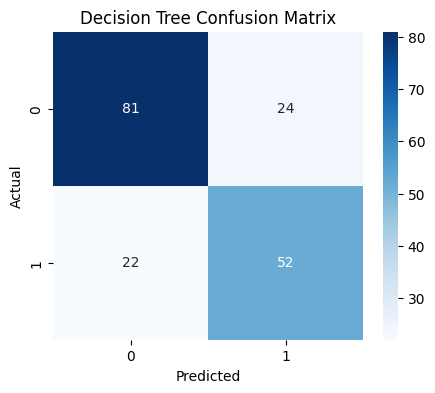

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       105
           1       0.68      0.70      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179
 

----------------+---------------------+------------------ 

Random Forest Accuracy: 0.8044692737430168 



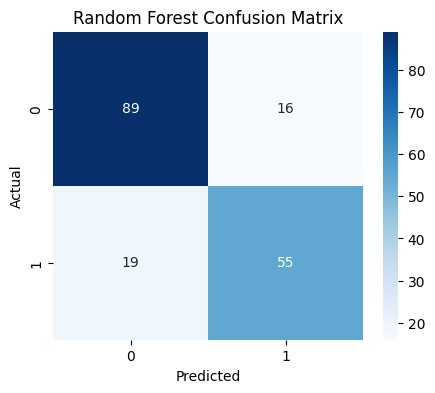

Random Forest Classification Report: 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179
 

----------------+---------------------+------------------ 



In [7]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy,'\n')

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Generate classification report
    report = classification_report(y_test, y_pred)
    print(f"{model_name} Classification Report:","\n")
    print(report,"\n")
    print("----------------+---------------------+------------------","\n")
